In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


# OpenCV ML

In [ ]:
import cv2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data ,data.target)

In [ ]:
# 편미분을 위한 데이터 타입 변환 
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
X_train.shape

(112, 4)

In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(X_train,cv2.ml.ROW_SAMPLE, y_train) # transpose되어 있는 데이터를 transpose하면 연산에 비효율적이기 때문에 내부적으로 최적화 계산을 해준다 

True

In [ ]:
cv2.ml.ROW_SAMPLE

0

In [ ]:
y_test.shape

(38,)

In [ ]:
knn.predict(X_test)[1].reshape(38) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Assumption

```
가정이 많아지면 많아질 수록 가정을 만족하는 데이터에 대해서는 성능이 좋아지지만, 일반성은 떨어진다 
즉, 잘 정제된 데이터를 학습해서 좋은 데이터에서는 성능이 좋지만, 정제되지 않은 현실 데이터에 적용하기에는 좋지 않은 모델이 만들어질 수 있다 
```

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


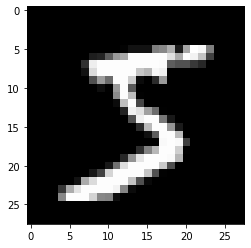

In [ ]:
plt.imshow(X_train[0], cmap='gray') # 패턴이 뚜렷하게, 크기를 일치하는 가정을 둔 사례 

## 대체적으로 성능 좋은 알고리즘 (대세) 

```
1980 - 1990 ANN
1990 - 2000 SVM
2000 - 2010 Ensemble (Random Forest)
     - Structured data => Boosting - XGBoosting, LightGBM
     - ETC (Deep Learning) 

데이터가 작을 때에는 SVM부터 사용하는 것이 좋다 
왜냐하면 Ensemble, Boosting, Deep Learning은 데이터가 많을 때라는 가정이 있어야 성능이 좋기 때문이다 
```  

# Neural Network 

```
Neural network는 뉴런에서 영감을 얻어 데이터를 통해 스스로 학습이 가능하도록 설계된 알고리즘, 네트워크 또는 모델이라고 한다 

모델의 구조를 먼저 정하고 
그 구조에 있는 파라미터를 찾는 모델 방식을 가진다  

구조도 학습을 통해서 알아낼 수 있다 (NAS/Neural Architecture Search)
```

## Hypothesis

```
가설은 어떤 현상을 해결하기 위한 함수이고 사실과 비슷하다고 믿는 함수이다 
```

## Model 

```
머신러닝에서는 가설 = 모델이다 
정의 자체에서 모델은 항상 틀릴 수 있다 

모델은 시스템 관점에서 머신러닝 알고리즘을 사용해서 데이터로 학습시킨 것을 머신러닝 모델이라고 한다  

※ scikit-learn에서 학습 안된 알고리즘을 estimator라고 한다  
```

## 모델의 4가지 관점 

```
1. 수학적으로 표현할 수 있어야 한다 
2. 그림 또는 그래프로 표현할 수 있어야 한다 
3. 통계치를 통해서 표현할 수 있어햐 한다 
4. 코드를 통해서 표현할 수 있어야 한다 
```

## 모델 분류 기준들 

```
1. Linear vs Nonlinear
- Linear는 aX+b에서 a와 b를 찾는데 집중한다
- Nonlinear는 회귀식이 비선형 함수로 나타내는 경우를 말한다 
2. Generative vs Discriminative
- Generative는 입력값과 결과값이 주어질때, 일정한 분포 규칙속에 존재한다는 가정을 하는 모델 
- Discriminative는 입력 데이터가 있을 때 label data를 구별해내는 모델 
3. Black box vs Descriptive 
- Black box는 설명 불가능 
- Descriptive는 설명 가능 
4. First-principle vs Data-driven
- First-principle은 원리, 규칙에 기반한 모델인가 
- Data-driven은 데이터에 기반한 모델인가 
5. Stochastic vs Deterministic 
- Stochastic는 확률론적인 방법
- Deterministic 결정론적인 방법 
6. Flat vs Hierarchical 
7. Parametric vs Non-parametric
- Parametric는 고정된 개수의 파라미터들을 학습하여 튜닝하는 것 
- Non-parametric는 학습해서 튜닝할 파라미터가 명시적으로 존재하지 않거나 정확히 셀 수 없는 경우 

```

## Data modeling vs Algorithmic Modeling

```
Data modeling 
- 데이터를 바탕으로 파라미터를 찾는 것에 집중하는 모델
- 데이터를 해당 모델에 얼마나 잘 적합시키는 가에 초점이 있다
- 모델 자체를 가정하기 때문에 모델이 잘 못될 경우 잘 못된 결과를 도출 할 수 있다 
Algorithmic modeling
- 알고리즘을 모르는 상태에서 데이터를 통해 모델을 새로 만드는 방법 

```

## Perceptron

```
뉴런을 모방한 알고리즘 또는 모델 
Perceptron과 linear model의 차이점은 선형 함수의 기울기와 bias를 찾는 방법이 다르다  
perceptron은 delta rule에 의해서 학습을 한다  
delta rule은 기대값과 실제값의 차이를 줄여 나가는 방식으로 싱글 레이어 퍼셉트론에서 인공 뉴런들의 연결 강도를 갱신하는데 쓰인다 
```

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
per = Perceptron() # linear model 

In [ ]:
per.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
per.score(X_test, y_test)

0.8947368421052632

## MLP(Multi Layer Perceptron)

```
MLP는 perceptron를 쌓기 위해서 Layer 개념을 도입하고 여러 layer를 연결한 형태를 말한다   
```

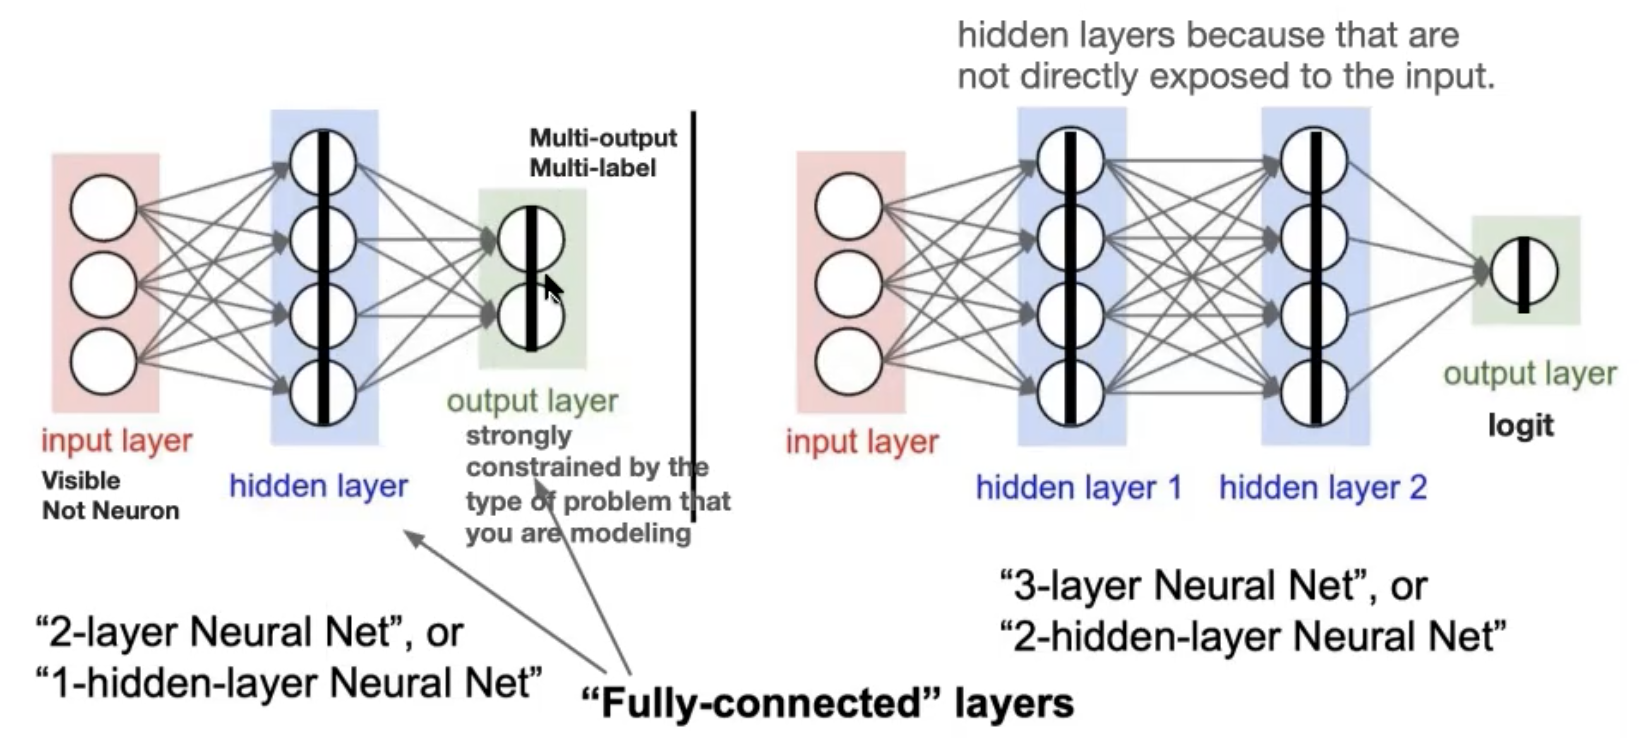

```
neural network는 기본적으로 fully connected여야 한다 
```

## Memorization Capacity

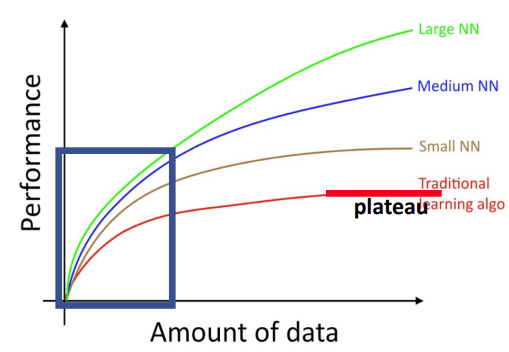

```
Layer가 많으면 많을 수록 성능이 좋아진다 
그러나 ML에서 feature처럼 layer가 많으면 많을 수록 데이터가 많이 필요하다   

전통적인 머신러닝 알고리즘에서는 데이터가 아무리 많아도 더 이상 성능이 올라가지 않는 plateau라는 현상이 생긴다 
```

## Universal Approximation Theorem

```
이론적으로 activation 함수가 비선형 일때 레이어가 많으면 어떠한 형태의 함수도 만들어 낼 수 있다 
따라서 어떠한 데이터 셋도 분류 할 수 있다  

단, activation function을 sigmoid나 tanh같은 함수를 사용하면 gradient vanishing현상이 생긴다 
```


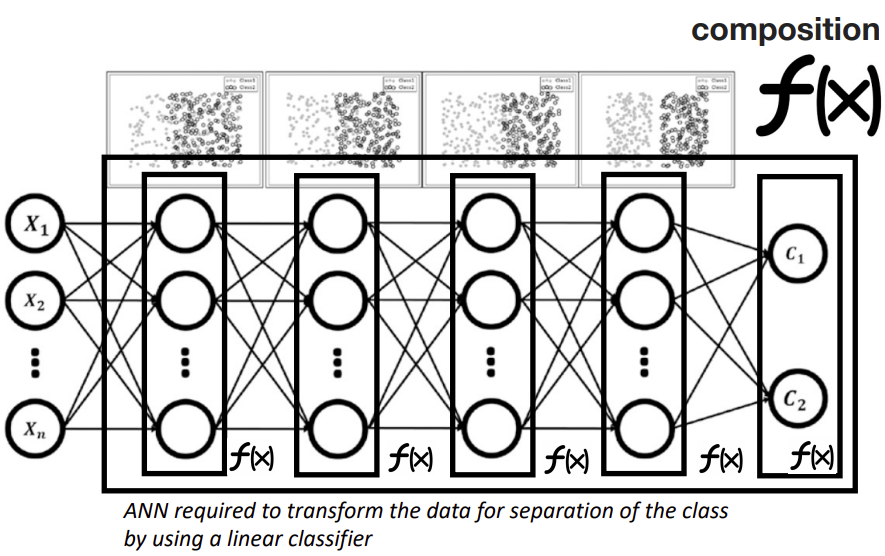

```
layer를 함수라고 본다면 
neural network는 composition function이다
```

## Feature cross

```
두 개 이상의 feature를 연산해서 새로운 feature형태로 만들어 주는 기법 
```

## Gradient vanishing

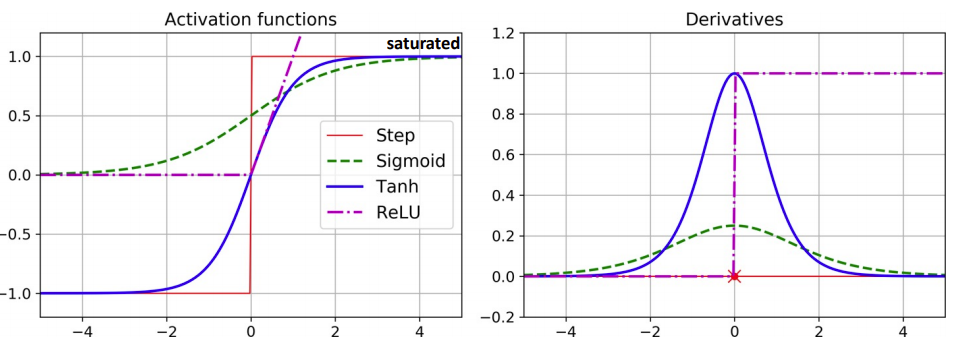

```
Gradient vanishing은 Back-propagation(편미분 연산)을 할 때마다 gradient가 전달이 되야하는데 
sigmoid나 tanh와 같은 activation을 사용하는 네트워크에서 깊이가 깊어지면 값이 0이되어 학습이 안되는 현상을 말한다  
```

## Dying Relu

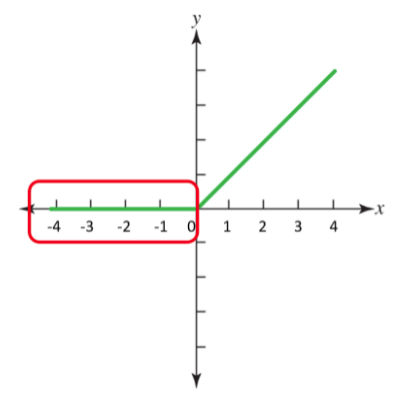

```
Dying relu는 모든 0이하의 입력에 대해서 미분 값이 0이 되어 가중치에 곱해지면서 해당 노드가 통째로 죽어버리는 현상을 말한다 
```

## Optimization

```
실제값 - 예측값을 함수로 일반화 시키고 가능한 (실제값 - 예측값)을 가장 작게 만드는 과정을 최적화한다

최소값 찾는 문제는 미분하는 방법과 미분을 쓰지 않는 방법 두 가지로 나뉘어 해결 할 수 있다 
```

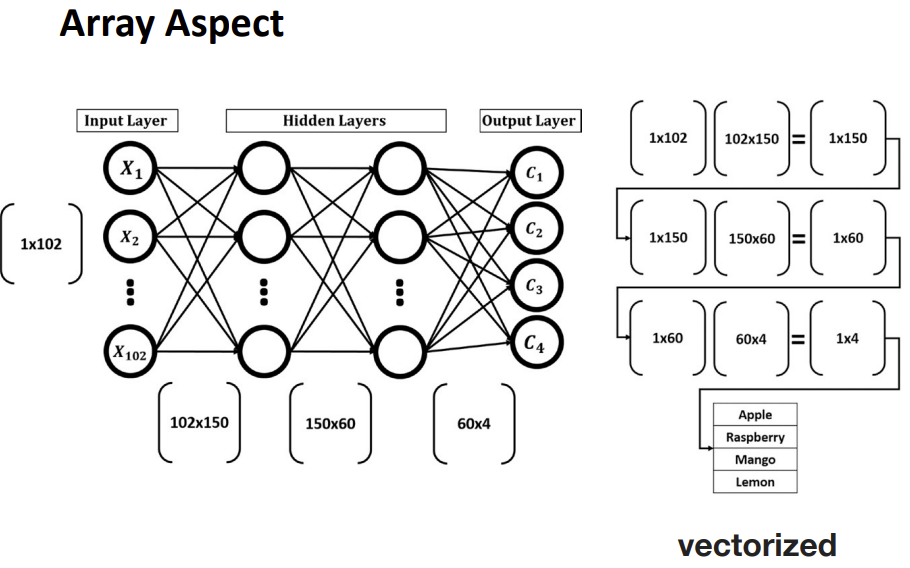

```
Fully connected된 layer는 array연산으로 바꿀 수 있다 
따라서 Neural Network는 vectorization이 최적화된 연산을 지원한다  
```

## Back propagation

```
수치 미분을 통해 최적화 하는 과정 
foward propagation이 결과를 prediction하는 과정이라면 
back propagation은 반대로 prediction된 결과와 실제 값의 오차를 계산하여 가중치를 업데이트하는 것을 말한다 
```

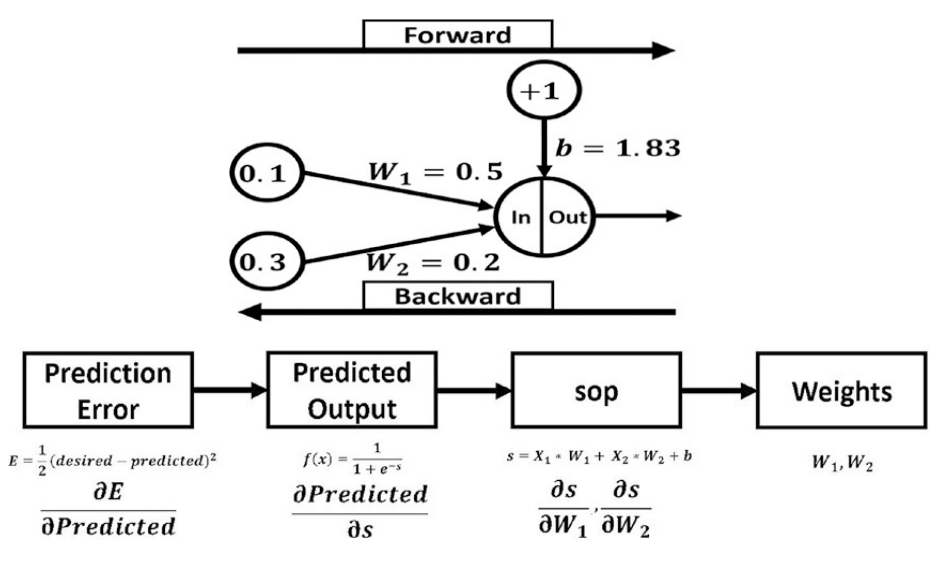

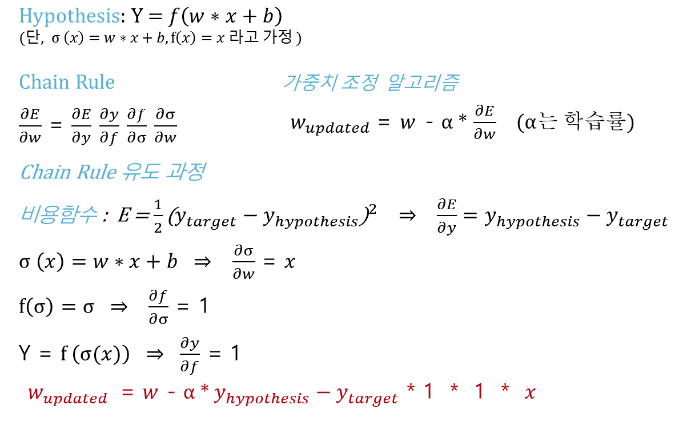

## Epoch

```
Back-propagation을 하는 과정에서 가중치가 업데이트 되었기 때문에 앞서 학습에 사용되었던 데이터는 가중치 업데이트에 영향을 거의 미치지 않게 되어 의미를 잃어버린다 
따라서 전에 학습했던 데이터를 재활용 함으로써 전체 데이터가 가중치를 업데이트하는데에 기여를 할 수 있도록 여러번 학습 시킨다  

단, Epoch을 많이 하면 할 수록 overfitting이 발생할 수 있다 

ex) 2 Epoch => 전체 데이터를 두 번 학습 시킨다 
```

## Regularization 

```
모델에 제약(penalty)을 줌으로써 overfitting을 방지하고 일반화 시키는 방법
```

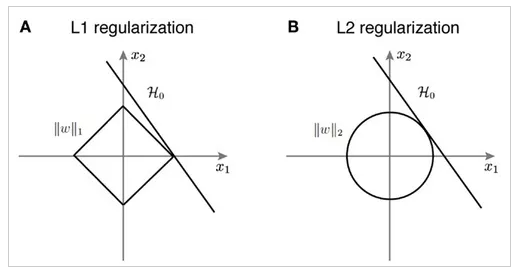

In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Perceptron

```
Lasso => L1을 추가한다 
Ridge => L2를 추가한다 
ElasticNeet => L1, L2를 추가한다 
```

## Learning Rate 

```
Gradient decent를 할 때 어느 정도의 보폭으로 최소값에 도달할 것인가를 지정하는 파라미터 => 학습률 

학습률이 클때는 속도가 빠른 대신 local minimum에 영원히 도달하지 못할 가능성이 있는 반면 
학습률이 작을때는 local minimum에는 도달할 수 있겠지만 속도가 매우느린 단점을 갖는다 
따라서 적당한 학습률을 선택하는 것이 중요하다 
```

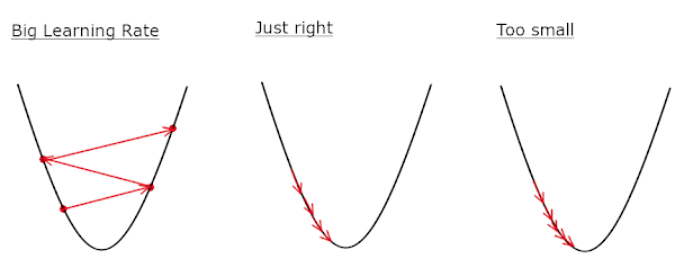